# Support Vector Machines (SVM).

## Introducción.
```{index} Support Vector Machines, SVM, Máquinas de Vector Soporte
```

Este método de clasificación-regresión, se desarrolló en la década de los años 90, y dentro del campo computacional. En su origen fue un método de clasificación binaria, pero posteriormente se extendió a problemas de clasificación múltiple y regresión.


Estas máquinas de vector soporte se fundamentan en el concepto de *Maximal Margin Classifier* el cual a su vez se fundamenta en el concepto de hiperplano ( que desde un punto de vista algebráico, no es más que una zona de dimensión n-1 que divide al espacio con el que estemos trabajando en dos mitades. Por ejemplo si estamos trabajando en dos dimensión, un hiperplano sería una recta - que tiene una dimensión n-1=2-1=1- mientras que si estamos en el espacio, un hiperplano sería un plano que tiene tiene dimensión 2 = 3-1 ). Para comprender los fundamentos matemáticos de SVM se requiere ciertos conocimientos de álgebra, y los mimos se desarrollarán en el siguiente apartado para que el lector pueda entender mejor el procedimiento que se utiliza con esta técnica de clasificación-regresión, aunque ya se advierte, que si bien es conveniente conocer y comprender estos fundamentos matemáticos, los mismos no son imprescindibles para que el lector pueda aplicar estas técnicas en la resolución de problemas de machine learning.

En este apartado nos centraremos en la utilización de esta metodología en base a las herramientas que nos proporciona scikit learn, no obstante para los amantes  el paquete estadístico R también se puede decir que disponen de dos librerías denominadas *e1071* y *LiblineaR* con las que se pueden hacer análisis de datos mediante estas Máquinas de Vector Soporte.


## Soporte matemático.

Para ir entrando en materia sobre al aparato matemático sobre el que se construye esta metodología, veamos a continuación cual es la expresión matemática de un hiperplano. En el caso de dos dimensiones, el hiperplano no es más que una recta que se define mediante la siguiente expresión matemática:

$$\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}=0$$

La ecuación anterior puede extenderse a un espacio de dimensión p de la siguiente manera:

$$\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\ldots+\beta_{p}x_{p}=0$$

A efectos de aligerar la notación, el hiperplano anterior también lo podemos representar en notación matricial de la siguiente manera:

$$\beta_{0}+\beta^{'}X=0$$

Siendo $\beta^{'}$ el vector transpuesto de los parámetros beta.

Entonces cuando un punto de dimensión p, X verifica que 

$$\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\ldots+\beta_{p}x_{p}<0$$

o bien

$$\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\ldots+\beta_{p}x_{p}>0$$

diremos que el punto X cae a un lado u otro del hiperplano, y por lo tanto esta es la idea a tener en cuenta cuando intentamos hacer una separación de puntos, que es la finalidad de los métodos de clasificación.

### Datos "separados linealmente".

En este caso vamos a suponer que constamos con n datos $x_{i}\:\epsilon\:\mathbb{R^{\textrm{p}}}$, que pertenecen a dos tipos de clases, $y_{i}\ \epsilon\ \{-1,1\}$ y que existe un hiperplano $\{X:\beta_{0}+\beta^{'}X=0 \}$ que separa perfectamente estos puntos. Entonces se tiene lo siguiente:

$$\begin{cases}
\beta_{0}+\beta^{'}X_{i}>0 & si\ y_{i}=1\\
\beta_{0}+\beta^{'}X_{i}<0 & si\ y_{i}\ =-1
\end{cases}$$

Lo cual se puede escribir mediante una simple ecuación de la siguiente manera:

$$(\beta_{0}+\beta^{'}X_{i})\cdot y_{i}>0$$ 

para i=1,2,...,n


* Se puede comprobar que el LDA (Lineal Discriminant analysis) y la regresión logística buscan hiperplanos separantes lineales pero se puede comprobar que no siempre encuentran un hiperplano que separa perfectamente los grupos aunque éstos sí sean "linealmente separables".

* El objetivo del Support Vector Machine (SCM) es que si los datos son separables linealmente vamos a buscar un hiperplano que mejor separe los mismos, en el sentido de dejar mayor "margen". Esto se puede observar en la siguiente figura.

![SVM1](figuras/svm1.PNG)


Recordemos de álgebra, que la distancia de un punto x a un hiperplano definido por  $\{X:\beta_{0}+\beta^{'}X=0 \}$ es $\pm\frac{1}{\left\Vert \beta\right\Vert }(\beta_{0}+\beta^{'}X)$ 

Entonces si tomamos parámetros beta unitarios, es decir $\left\Vert \beta\right\Vert \ =\ 1$ y los datos son separables linealmente entonces la distancia del punto $X_i$ al hiperplano separante será $y_{i}\cdot(\beta_{0}+\beta^{'}X_{i})$, que como ya hemos visto anteriormente será siempre un valor positivo.

Entonces el problema que queremos resolver, se puede expresar mediante la siguiente expresión matemática:

$$\underset{\beta_{0},\beta\ con\ \left\Vert \beta\right\Vert =1}{max}M\qquad sujeto\ a\ y_{i}(\beta_{0}+\beta^{'}X_{i})\ \geq\ M$$

En la expresión anterior, lo que pretendemos indicar es que la distancia de todos los puntos $X_i$ al hiperplano deben ser mayores que el margen M.

Podemos mejorar el planteamiento del problema si en lugar de tomar $\left\Vert \beta\right\Vert =1$ se toma un $\beta$ tal que la restricción $y_{i}(\beta_{0}+\beta^{'}X_{i})\ \geq\ M$ se simplifique a $y_{i}(\beta_{0}+\beta^{'}X_{i})\ \geq\ 1$. En este caso, se puede demostrar que la distancia de las observaciones en los "márgenes" es $M=1/\left\Vert \beta\right\Vert $ y por lo tanto maximizar $M=1/\left\Vert \beta\right\Vert $ es equivalente a minimizar $\left\Vert \beta\right\Vert$ y en consecuencia el problema puede reescribirse como.

$$\underset{\beta_{0},\beta}{min}\frac{1}{2}\left\Vert \beta\right\Vert ^{2}\qquad sujeto\ a\ y_{i}(\beta_{0}+\beta^{'}X_{i})\ \geq\ 1$$

Con el problema de optimización anterior, se puede probar lo siguiente:

$\beta=\sum_{i=1}^{n}\alpha_{i}y_{i}x_{i}$

$\alpha_{i}\geq0$

$\alpha_{i}\ge0$ sólo para los puntos que verifican $y_{i}(\beta_{0}+\beta^{'}x_{i})=1$, es decir las únicas observaciones que contribuyen a calcular lo $\beta$ son aquellas que están exactamente en los "márgenes", que son los denominados *Puntos de soporte* o *Support Vector Machines*.

![SVM2](figuras/svm2.PNG)

Por lo tanto el método de Support Vector Machines (SVM) ponen todo su esfuerzo clasificatorio centrándose en las observaciones "fronterizas" entre los grupos. Esta es una diferencia muy importante, respecto a otros métodos clasificatorios como el LDA(lineal discriminant analysis), QDA (quadratic discriminant analysis) o la regresión logística que usan todas las observaciones de las clases, aunque éstas fueran fácilmente separables.


### Casos cuasi-separables linealmente.

El hiperplano obtenido anteriormente se denomina *maximal margin hyperplane* y está obtenido bajo unas condiciones que normalmente no se dan, pues lo más normal es que los datos no se pueden separar linealmente de forma perfecta. Entonces para dar solución a esto lo que se suele hacer es extender el concepto de  *maximal margin hyperplane* para obtener otro hiperplano que "casi" separe las clases y permitir de esta manera que se cometan una mínima cantidad de errores. A este nuevo hipeplano se le conoce con el término de *Support Vector Classifier* o *Solf Margin*.

Por estas razones, es preferible crear un clasificador basado en un hiperplano que, aunque no separe perfectamente las dos clases, sea más robusto y tenga mayor capacidad predictiva al aplicarlo a nuevas observaciones (menos problemas de overfitting). Esto es exactamente lo que consiguen los *clasificadores de vector soporte*, también conocidos como *soft margin classifiers* o *Support Vector Classifiers*. Para lograrlo, en lugar de buscar el margen de clasificación más ancho posible que consigue que las observaciones estén en el lado correcto del margen; se permite que ciertas observaciones estén en el lado incorrecto del margen o incluso del hiperplano.

La formulación matemática que se ha ideado para este tipo de situaciones es la siguiente.

```{index} variables de holgura, slack variables
```

Para poder admitir puntos $X_i$ "mal clasificados", se admiten observaciones en lados no verificando los "márgenes" y penalizando  el tamaño de esa "mala clasificación" con un coste dado que denotaremos con C. En esta ocasión se van a permitir las denominadas variables de holgura o *slack variables", $\xi$.De esta forma el problema matemático a resolver sería el siguiente:

$$\underset{\beta_{0},\beta}{min}\frac{1}{2}\left\Vert \beta\right\Vert ^{2}+C\sum_{i=1}^{n}\xi_{i}\qquad sujeto\ a\ y_{i}(\beta_{0}+\beta^{'}X_{i})\ \geq\ 1-\xi_{i}\ y\ \xi_{i}\ge0$$


![SVM3](figuras/svm3.PNG)

La identificación del hiperplano de un clasificador de vector soporte, que clasifique correctamente la mayoría de las observaciones a excepción de unas pocas, es un problema de optimización convexa,y como se puede ver, este proceso incluye un hiperparámetro de *tuning* C, que controla el número y severidad de las violaciones del margen (y del hiperplano) que se toleran en el proceso de ajuste. Si C=∞, no se permite ninguna violación del margen y por lo tanto, el resultado es equivalente al *Maximal Margin Classifier* (teniendo en cuenta que esta solución solo es posible si las clases son perfectamente separables). Cuando más se aproxima C a cero, menos se penalizan los errores y más observaciones pueden estar en el lado incorrecto del margen o incluso del hiperplano. C es a fin de cuentas el hiperparámetro encargado de controlar el balance entre bias y varianza del modelo. En la práctica, su valor óptimo se identifica mediante cross-validation.


Existen en internet (eso si, en inglés) una buena cantidad de tutoriales explicando esta materia. A continuación se plasman una serie de enlaces a esas páginas web que ayudarán al lector interesado a comprender mejor este procedimiento. 


* https://www.youtube.com/watch?v=ny1iZ5A8ilA

* https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf

* https://cse.iitkgp.ac.in/~dsamanta/courses/da/resources/slides/10SupportVectorMachine.pdf

* https://www.hindawi.com/journals/aaa/2014/836895/?utm_source=google&utm_medium=cpc&utm_campaign=HDW_MRKT_GBL_SUB_ADWO_PAI_DYNA_JOUR_Complexity_X0000_Geotarget&gclid=CjwKCAjwi8iXBhBeEiwAKbUofRLpuyloKYLODWxPRdbasxk4nrFXA7YeVbwBUm37IlCpE-kui1XrhBoCLm8QAvD_BwE

Si tenemos interés en resolver este tipo de problemas mediante el paquete estadístico R, se puede consultar el siguiente enlace:

* https://bookdown.org/aurora_tumminello/statistics_lab/support-vector-machines.html


### Separación no lineal de puntos.

El método de separación de puntos explicado anteriormente, consigue buenos resultados, cuando el límite de separación de los mismos es aproximadamente lineal, cuando no se da esta premisa, los resultados obtenidos decaen considerablemente. Entonces, una estrategia para enfrentarse a escenarios en los que la separación de los grupos es de tipo no lineal consiste en expandir las dimensiones del espacio original.

El hecho de que los grupos no sean linealmente separables en el espacio original no significa que no lo sean en un espacio de mayores dimensiones. Las imágenes siguientes muestran como dos grupos, cuya separación en dos dimensiones no es lineal, sí lo es al añadir una tercera dimensión.


![SVM4](figuras/svm4.PNG)

```{index} kernel
```

Ahora bien la pregunta inmediata que aparece ante esta situación es ¿Cómo se aumenta la dimensión y cual sería la dimensión correcta a tener en cuenta?. Para aumentar la dimensión del espacio, lo que se hace normalmente es utilizar diferentes funciones, denominadas *Kernel*, siendo un ejemplo el siguiente:

$$f(x_{1},x_{2})=(x_{1}^{2},\sqrt{2}x_{1}x_{2},x_{2}^{2})$$

Los kernels más usados son los siguientes.

#### Kernel polinómico.

La expresión matemática es la siguiente:

$$K(x,x^{'})=(x\cdot x^{'}+c)^{d}$$

Cuando se toma d=1 y c=0, se obtiene el denominado *kernel lineal*. Si d>1 entonces se generan límites de decisión no lineales, siendo menos lineales a medida que se incrementa el valor de d, y además se recomiendan valores de d menores o iguales a 5 para evitar problemas de sobreajuste (overfitting).


![SVM5](figuras/svm5.PNG)


#### Kernel bases radiales.

Este kernel también es conocido como kernel Gaussian (RBF) y su expresión matemática es la siguiente:

$$K(x,x^{'})=exp(-\gamma\left\Vert x-x^{'}\right\Vert ^{2})$$

![SVM6](figuras/svm6.PNG)

El valor del parámetro $\gamma$ controla el comportamiento del kernel, de tal manera que si $\gamma$ es muy pequeño el modelo que se obtiene es muy similar al kernel lineal, y a medida que se incrementa el valor de este parámetro también lo hace la flexibilidad del modelo.

#### Ajuste de los parámetros.

Los parámetros de los modelos/kernels mencionados anteriormente, es decir, el parámetro C (coste mal-clasificación), d (núcleo polinómico) o $\gamma$ (bases radiales) se suelen elegir mediante validación cruzada, y además hay que tener en cuenta que cuanto mayor es el valor de estos parámetros, mayor riesgo se tiene de sobreajuste.

## SVM para más de dos clases.

```{index} DAGSVM (Directed Acyclic Graph SVM)
```

El concepto de hiperplano de separación en el que se basan los SVMs no se generaliza de forma natural para más de dos clases. Se han desarrollado numerosas estrategias con el fin de aplicar este método de clasificación a situaciones con k>2-clases, de entre ellos, los más empleados son: one-versus-one, one-versus-all y DAGSVM.

Las estrategias one-versus-one, one-versus-all se desarrollan [predicción con multiclases](multiclases), por lo que no se vuelven a repetir los conceptos en este apartado.

DAGSVM (Directed Acyclic Graph SVM) es una mejora del método one-versus-one. La estrategia seguida es la misma, pero consiguen reducir su tiempo de ejecución eliminando comparaciones innecesarias gracias al empelo de una directed acyclic graph (DAG). Supóngase un set de datos con cuatro clases (A, B, C, D) y 6 clasificadores entrenados con cada posible par de clases (A-B, A-C, A-D, B-C B-D, C-D). Se inician las comparaciones con el clasificador (A-D) y se obtiene como resultado que la observación pertenece a la clase A, o lo que es equivalente, que no pertenece a la clase D. Con esta información se pueden excluir todas las comparaciones que contengan la clase D, puesto que se sabe que no pertenece a este grupo. En la siguiente comparación se emplea el clasificador (A-C) y se predice que es A. Con esta nueva información se excluyen todas las comparaciones que contengan C. Finalmente solo queda emplear el clasificador (A-B) y asignar la observación al resultado devuelto. Siguiendo esta estrategia, en lugar de emplear los 6 clasificadores, solo ha sido necesario emplear 3. DAGSVM tiene las mismas ventajas que el método one-versus-one pero mejorando mucho el rendimiento.

**NOTA**. En scikit learn se cuenta con el hiperparámetro denominado *decision_function_shape* que puede tomar los valores ‘ovo’ o ‘ovr’ para que de forma trasparente al usuario se pueda hacer esta clasificación de más dos clases.

## SVM en scikit learn.

Scikit learn tiene implementadas diferentes clases para realizar trabajos tanto de clasificación como de regresión utilizando la metodología de SVM descrita anteriormente. En este apartado vamos a detallar las herramientas que scikit learn nos proporciona tanto para clasificación como para regresión

### Clasificación.

Existen tres clases que podemos utilizar en scikit learn para realizar predicciones de clasificación: 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC" target="_blank"> SVC </a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC" target="_blank"> NuSVC </a> y <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC" target="_blank"> LinearSVC </a>.

Las clases SVC y NuSvc son métodos muy similares pero aceptan una serie de parámetros ligeramente diferentes, y con una <a href="https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation" target="_blank"> formulación matemática también distinta</a>. En el caso de *LinearSVC* es otra implementación de SVM que se ejecuta de forma más rápida, pero sólo se usa cuando el kernel es de tipo lineal.

Estos tres modelos, aceptan como datos de entrada dos arrays:

* Un array X de dimensión (n_observaciones, n_features), que contiene los datos de entrenamiento.

* Un array y que contiene el código de pertenencia a una determinada clase. De dimensión (n_observaciones). 

A continuación se muestra un ejemplo de uso de la clase SVC en el que se puede observar la influencia que tiene el parámetro C a la hora de obtener el hiperplano de separación de los dos grupos que se forman al utilizar la función mak_blobs utilizada para generar los datos



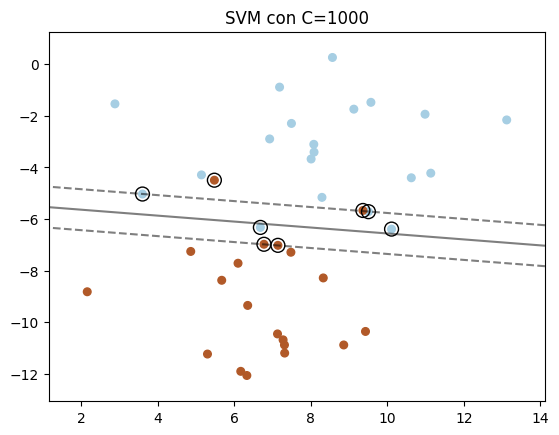

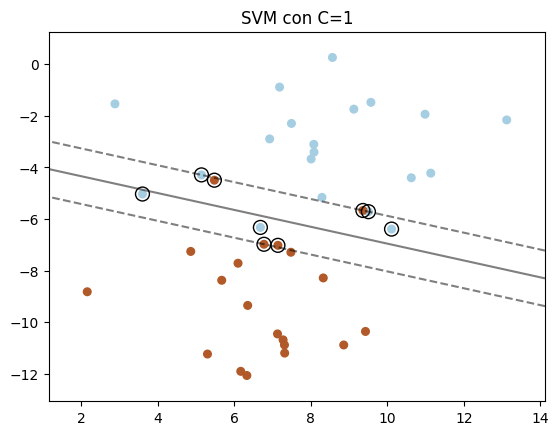

In [16]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


# creamos 40 puntos con una desviación estándar de 2
X, y = make_blobs(n_samples=40, centers=2, random_state=6, cluster_std=2)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

clf2 = svm.SVC(kernel="linear", C=1)
clf2.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# dibujamos la función de decisión
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# dibujamos los vectores de soporte
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.title("SVM con C=1000")
plt.show()

# Hacemos algo similar a lo anterior pero en este caso para C=1 (modelo clf2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf2,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    clf2.support_vectors_[:, 0],
    clf2.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.title("SVM con C=1")
plt.show()

Para datos no balanceados, existe también la posibilidad de dar diferentes pesos o importancia a las clases con las que se trabaja. Los parámetros que se pueden utilizar para hacer estos son *class_weight* y *sample_weight* (¡¡¡ojo!!! *sample_weight* es un parámetro del método fit). 

La clase *SVC* implementa por ejemplo el parámetro *class_wieght*, el cual debe tener como valor un diccionario si se quieren asignar diferentes pesos a las clases de datos. Este diccionario debe tener un formato {class_etiqueta: valor} de tal forma que el valor debe ser un número flotante mayor que cero, de tal manera que el valor de C quedaría multiplicado por ese valor y dependiendo de la clase a la que corresponda cada observación.

Con el parámetro *sample_weight* del método *fit* también se pueden modificar los pesos, pero en este caso de cada observación, de tal manera que en este caso, el parámetro C queda modificado dependiendo del peso de cada observación, y en este sentido si denotamos por peso[i] el peso asignado a la observación i-ésima, entonces C se modifica por C * peso[i] .

### Regresión.

El método de Support Vector Classification puede ser extendido de forma fácil para los problemas de regresión. A este método se le designa por Support Vector Regression.

En scikit learn existen existen tres implementaciones diferentes de Support Vector Regression:

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR" target="_blank">SVR</a>

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR" target="_blank">NuSVR</a>

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR" target="_blank">LinearSVR</a>

Como puede verse el esquema y nomenclatura es muy similar a lo que ya se ha visto para la clasificación de los datos, y al igual que ocurría para la clasificación, en este caso se puede decir que *LinearSVR* es más rápido que *SVR* pero sólo admite como kernel el formato lineal, mientras que *NuSCR* implementa una formulación algo diferente a *SVR* y *LinearSVR*.

## Ejemplos.

En los ejemplos que siguen vamos a ver cómo influyen los parámetros más importantes de SVC en la obtención de los resultados de los modelos.

Comenzamos por importar algunas librerías y obteniendo los datos con los que se van a trabajar.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

# importamos el conjunto de datos iris
iris = datasets.load_iris()
X = iris.data[:, :2] # Tomamos sólo las dos primeras features, para su representación gráfica
y = iris.target

Vamos a definir la función que servirá para hacer todas las representaciones gráficas

In [20]:
def plotSVC(titulo):
    # creamos una rejilla para la representación gráfica
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
     np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(titulo)
    plt.show()

A continuación definimos diferentes parámetros kernel para ver los resultados que se obtienen con ellos

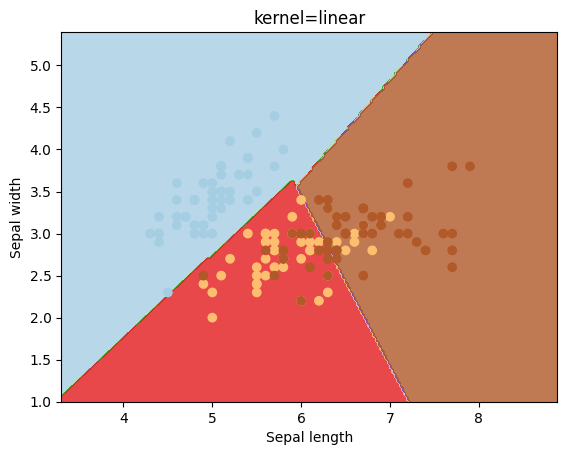

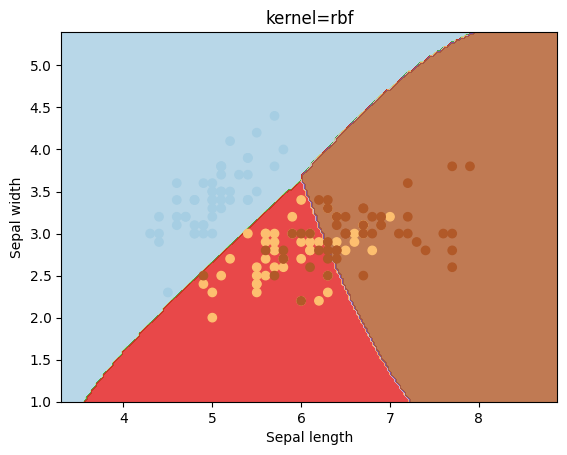

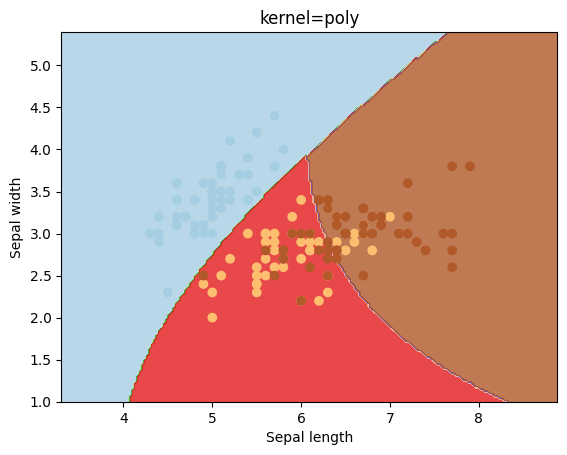

In [23]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC('kernel=' + str(kernel))

El parámetro gamma es un parámetro que se utiliza para el kernel igual a rbf. Veamos los resultados que se obtienen con diferentes valores para este parámetro.

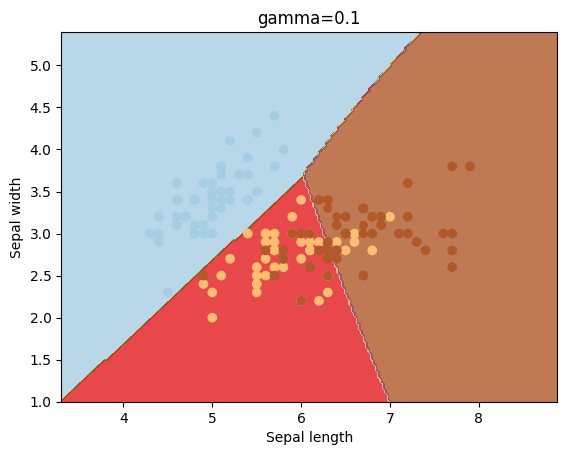

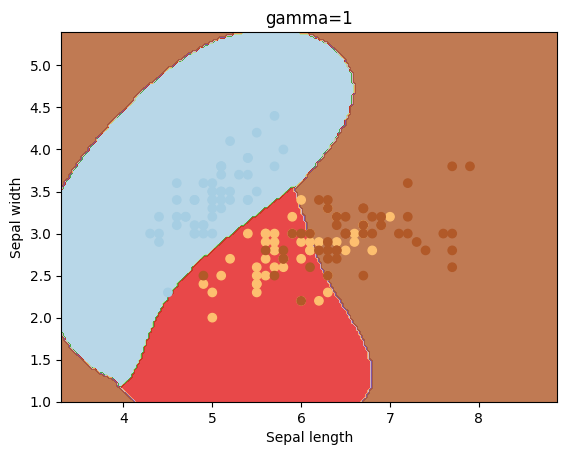

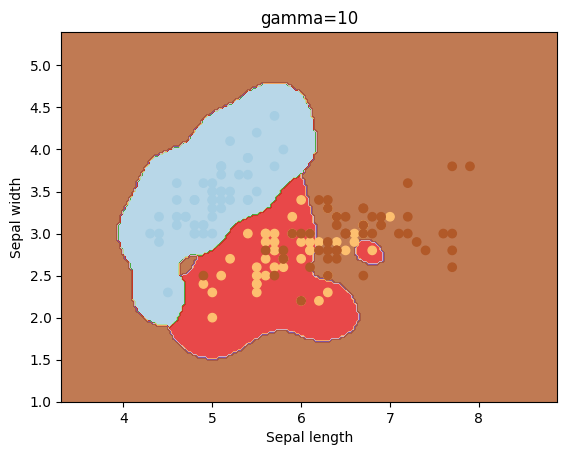

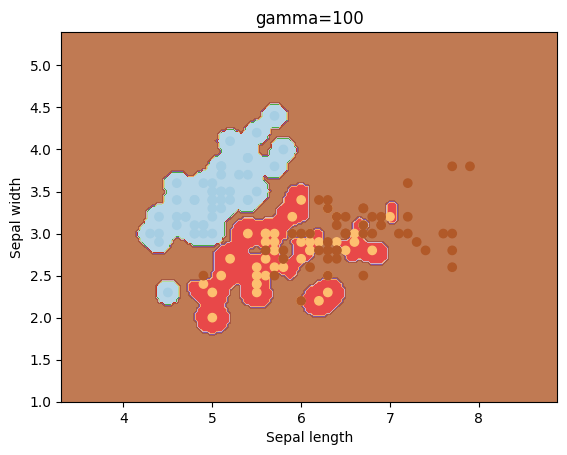

In [25]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('gamma=' + str(gamma))

El parámetro C sirve para penalizar la mal clasificación de los puntos, y dependiendo de su valor el "margen" tomará un valor mayor o menor.

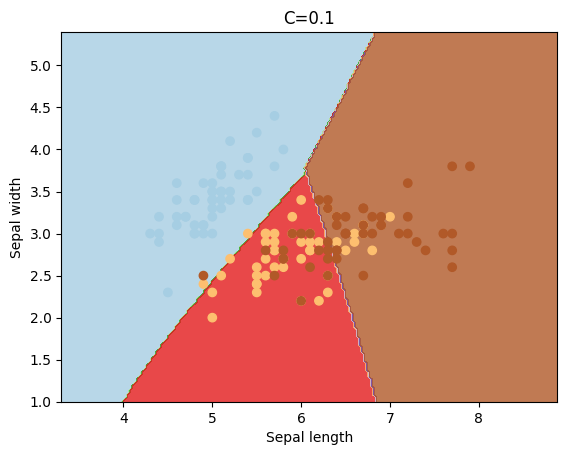

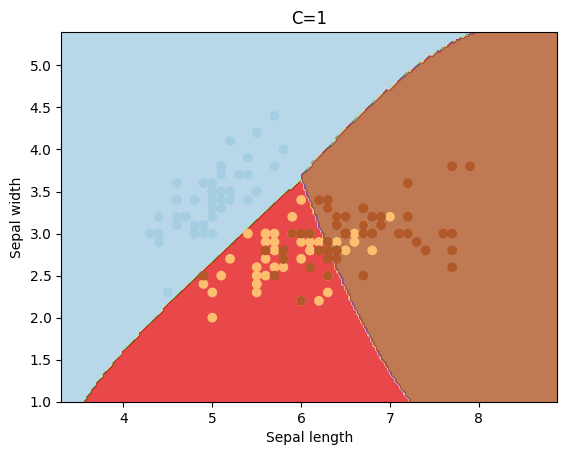

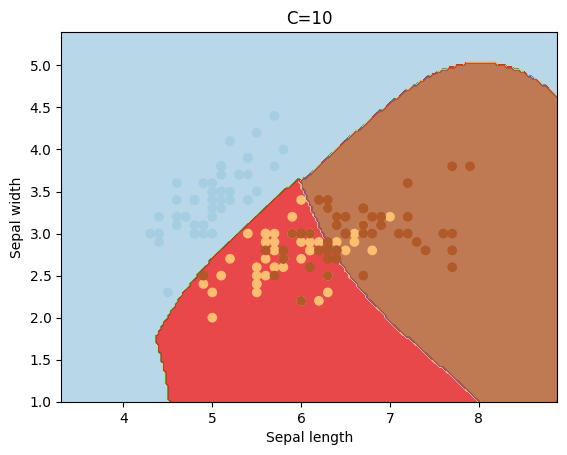

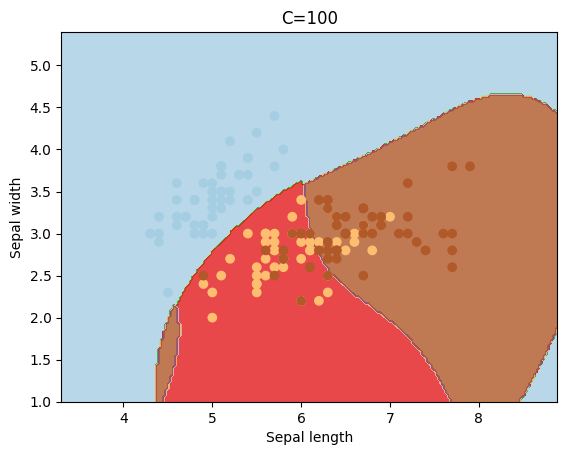

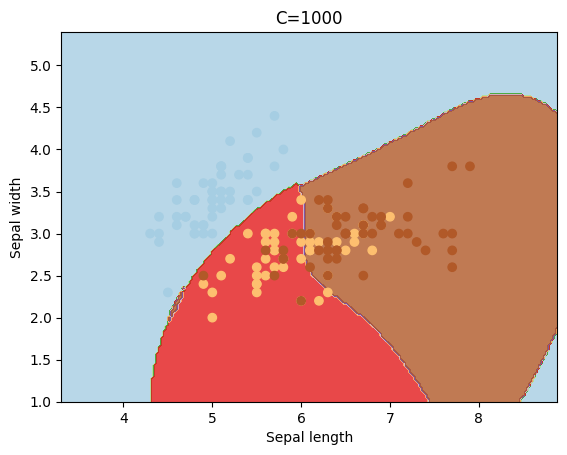

In [26]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
   svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
   plotSVC('C=' + str(c))

Otro kernel que se suele utilizar es el polinómico, el cual puede tener diferentes valores para el grado del mismo.

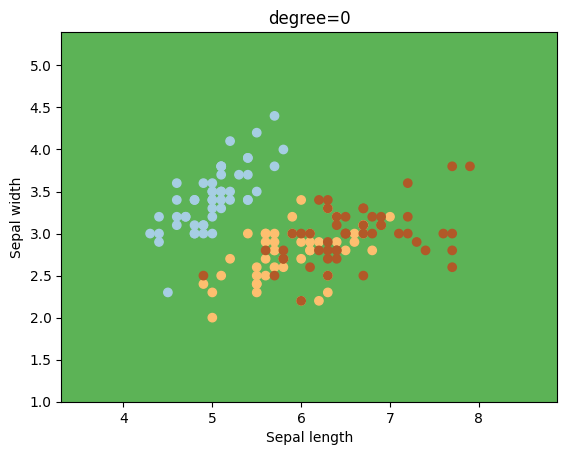

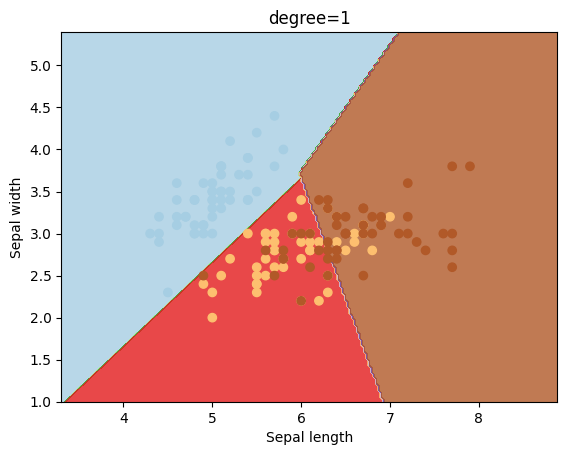

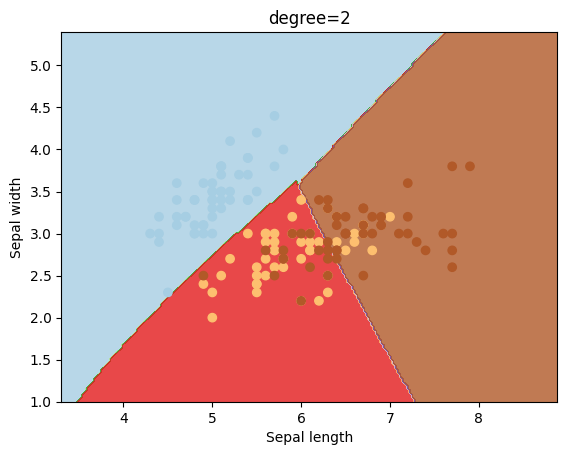

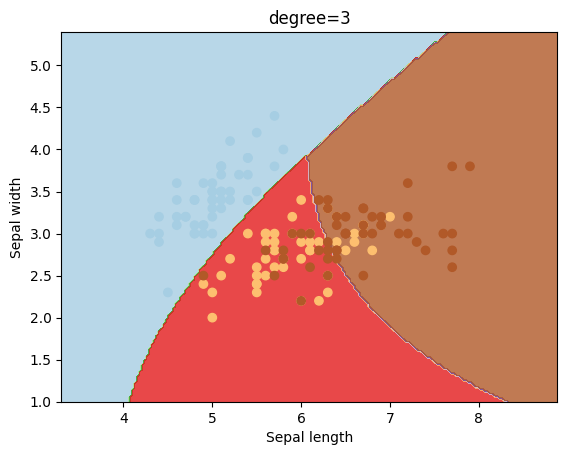

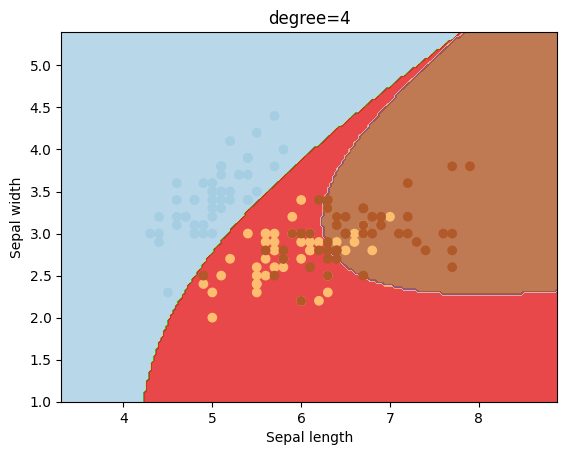

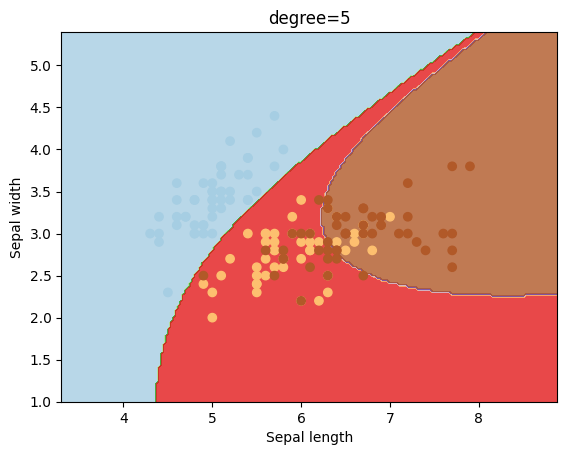

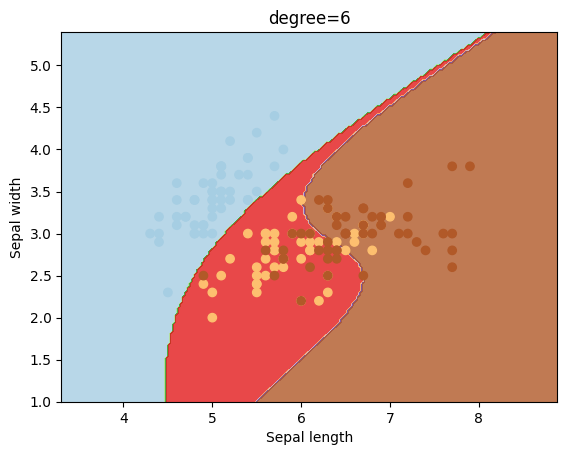

In [27]:
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
   svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
   plotSVC('degree=' + str(degree))

## Bibliografía.

* <a href="https://www.syncfusion.com/succinctly-free-ebooks/support-vector-machines-succinctly" target="_blank">Support Vector Machines Succinctly by Alexandre Kowalczyk </a>

* A Practical Guide to Support Vector Classification by Chih-Wei Hsu, Chih-Chung Chang, and Chih-Jen Lin

* <a href="https://www.researchgate.net/publication/263817587_Tutorial_sobre_Maquinas_de_Vectores_Soporte_SVM" target="_blank">Tutorial sobre Máquinas de Vector Soporte (SVM) Enrique J. Carmona Suárez </a>